In [3]:
cd /content/drive/My\ Drive/Whatsapp\ Chat\ Analysis/

/content/drive/.shortcut-targets-by-id/1ymUvpbcyy9XxHjLxlR6sWaTwc-lXXR-I/Whatsapp Chat Analysis


In [44]:
 pip install emoji --upgrade

Requirement already up-to-date: emoji in /usr/local/lib/python3.6/dist-packages (0.6.0)


In [47]:
import re
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', 500)
import datetime as dt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import string
import emoji

import warnings
warnings.filterwarnings("ignore")

In [48]:
def read(file):
    f = open('/content/drive/My Drive/Whatsapp Chat Analysis/{}'.format(file), 'r') 
    messages = re.findall('(\d+/\d+/\d+, \d+:\d+\d+ ([\w]+)) - (.*?): (.*)', f.read())
    f.close()
    hist = pd.DataFrame(messages,columns=['date','am-pm','name','msg'])
    hist['date'] = pd.to_datetime(hist['date'],format="%d/%m/%y, %I:%M %p")
    hist['msg_len'] = hist['msg'].str.len()
    hist['date1'] = hist['date'].apply(lambda x: x.date())
    return hist

In [49]:
files = os.listdir('/content/drive/My Drive/Whatsapp Chat Analysis')
lst = []
for file in files:
    history = read(file)
    lst.append(history)    
history = pd.concat(lst).reset_index()     

In [50]:
history.head(2)

,index,date,am-pm,name,msg,msg_len,date1
0,0,2019-09-26 21:20:00,pm,sachin,Helo,4,2019-09-26
1,1,2019-09-26 21:20:00,pm,Diwakar Awaaz 1,I m 💀,5,2019-09-26


In [51]:
history_clean = history[history['msg']!=' <Media omitted>']

In [52]:
history_clean[history_clean['name']=='sachin']['msg'].count()

58006

In [53]:
history_clean['name'].nunique() 

379

In [54]:
# Create a subset of the dataframe with only messages i've sent
msg_sachin = (history_clean[history_clean['name']=='sachin'])

In [55]:
msg_sachin.shape

(58006, 7)

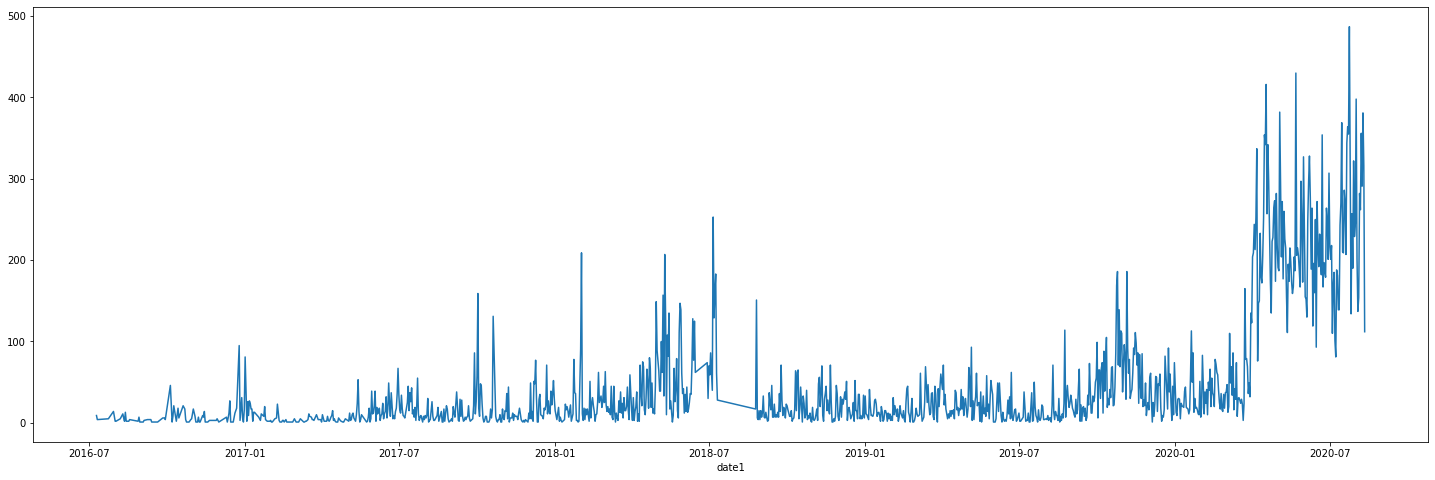

In [56]:
# Plot
plt.figure(figsize=(25,8))
msg_sachin.groupby(['date1']).count()['msg'].plot()

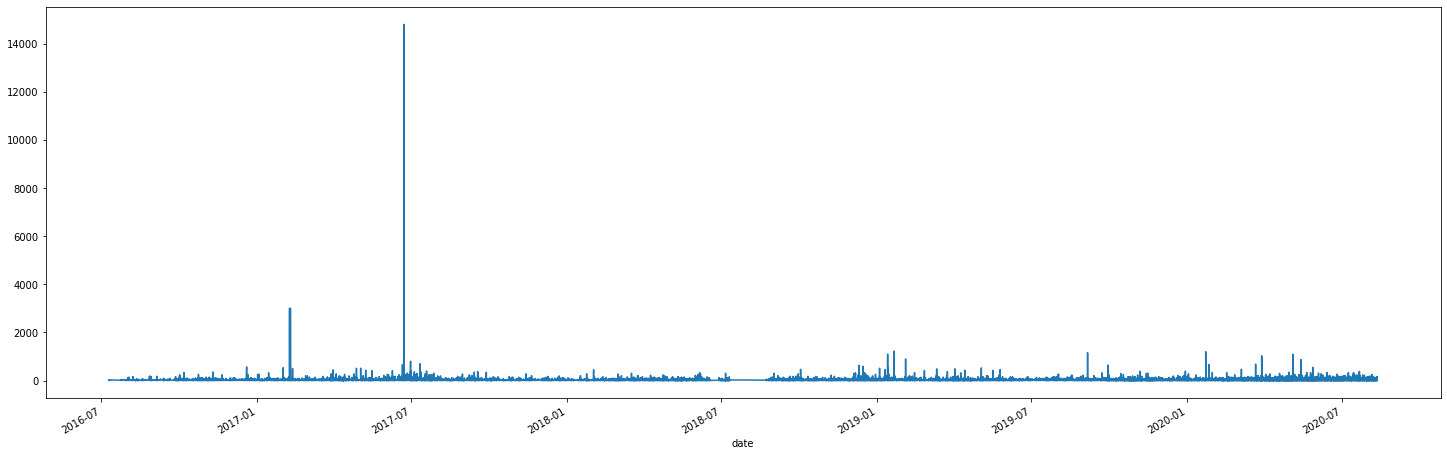

In [57]:
plt.figure(figsize=(25,8))
history.groupby(['date'])['msg_len'].mean().plot()

In [59]:
history_clean[history_clean['msg_len'] == history_clean['msg_len'].max()]['msg'].values

In [60]:
msg_sachin['day'] = msg_sachin['date'].dt.day_name()
msg_sachin['day'].value_counts()

Friday       8965
Sunday       8918
Monday       8634
Wednesday    8156
Thursday     8082
Saturday     7684
Tuesday      7567
Name: day, dtype: int64

In [61]:
msg_sachin['datehour'] = msg_sachin['date'].dt.hour
msg_sachin['datehour'].value_counts()

21    4624
22    4463
19    4197
12    4140
18    3922
17    3864
11    3724
14    3465
20    3457
16    3289
13    3194
10    2930
15    2695
23    2511
9     2439
8     1495
0     1386
7      922
6      392
1      363
2      214
5      169
3      101
4       50
Name: datehour, dtype: int64

In [62]:
msg_sachin['month'] = msg_sachin['date'].dt.month
msg_sachin['month'].value_counts()

5     9953
7     9122
4     8874
6     8269
8     3958
10    3420
3     2980
11    2831
12    2665
2     2273
1     2007
9     1654
Name: month, dtype: int64

In [63]:
# Counting number of emojis
def extract_emojis(str):
    return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)

def Count_Emojis(df):
    series = df['msg']
    all_words = ""
    for sentence in series:
        all_words += extract_emojis(sentence)
    word_count = Counter(all_words)
    
    
    ordered = {}
    ordered['msg'] = []
    for key, number in word_count.most_common()[:50]:
        ordered[key] = []
    
    for sentence in series:
        sentence_count = Counter(extract_emojis(sentence))
        
        for word in ordered:
            count = sentence_count[word] if sentence_count[word] else 0
            ordered[word] += [count]
    ordered['msg'] = list(series)
    ordered['date'] = list(df['date'])
    ordered['date1'] = list(df['date1'])
    ordered['name'] = list(df['name'])
    return pd.DataFrame(ordered)

In [67]:
emojis_counts = Count_Emojis(msg_sachin)

In [68]:
emojis_counts.head(1)

,msg,🙉,😂,😅,🏻,♂,🤣,🐠,🐋,🐟,🙄,😘,😯,🐵,👋,❤,🤷,😬,🤦,💆,😍,😭,👍,🔥,🧟,😛,🤤,😒,😓,🙊,🤔,😮,🤨,🐒,♀,👌,💤,🤬,🌞,🐍,😲,😶,🧐,🥵,🔨,😴,😁,😑,🥶,☀,🤩,date,date1,name
0,Helo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-09-26 21:20:00,2019-09-26,sachin


In [69]:
emoji_freq = emojis_counts.sum()